In [0]:
from google.colab import drive
drive.mount('/drive')


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **UNZIPPING THE TRAIN DATA**

In [0]:

import zipfile
zip_ref = zipfile.ZipFile("/content/drive/My Drive/Cdac Project/plant-seedlings-classification.zip", 'r')
zip_ref.extractall("/content/data1")
zip_ref.close()

In [0]:

import zipfile
zip_ref = zipfile.ZipFile("/content/data1/train.zip", 'r')
zip_ref.extractall("/content/data1/train")
zip_ref.close()

# **LIST OF USEFUL IMPORTS**

**IMPORTING ALL NECESSARY API'S**


In [0]:

%matplotlib inline
import os

import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns


# **SAVING THE PATH INTO A VARIABLE**

In [0]:

Train_data= "/content/data1/train/train"

# LIST OF TRAINING LABELS

**LISTING ALL FOLDERS OF TRAIN FOLDER. THESE FOLDERS SIGNIFY THE PRESENCE OF 12 DIFFERENT TYPE OF SEEDLING**

In [62]:
ls '/content/data1/train/train'

 Black-grass/        'Common wheat'/      'Scentless Mayweed'/
 Charlock/           'Fat Hen'/           'Shepherds Purse'/
 Cleavers/           'Loose Silky-bent'/  'Small-flowered Cranesbill'/
'Common Chickweed'/   Maize/              'Sugar beet'/


# **READ IMAGES AND REMOVE MISSING VALUES SAVE IMAGES IN IMAGE LIST**

**THIS COMMAND CONSISTS OF THREE STEPS**


1.   CREATING TWO LISTS TO HOLD IMAGES AND CLASSES RESPECTIVELY
2.   TRAVERSING EVERY FOLDER, APPENDING .PNG SO AS TO TRAVERSE    TO THE VERY IMAGE AND READ THAT IMAGE
3.IF NO BACKGROUND IN THE IMAGE, THAT WOULD MEAN THERE IS MISSING DATA PRESENT ELSE THE IMAGE IS VALID AND QUALIFIES TO BE APPENDED TO THE LIST CREATED.



In [0]:

images = []
classes=[]
missing=0
for class_folder_name in os.listdir(Train_data):
  class_folder_path = os.path.join(Train_data, class_folder_name)
  class_label = class_folder_name
  for image_path in glob(os.path.join(class_folder_path, "*.png")):
    image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image_bgr is None:
      missing += 1
      continue
    images.append(image_bgr)
    classes.append(class_label)
        
        

**NUMBER OF ALL IMAGES OBTAINED**

In [64]:

print(len(images))
print(len(classes))

4750
4750


**RESIZING IMAGES TO DIMENSION 256*256**

In [0]:

def resize_images(img):
  img = np.array(img).astype(np.uint8)
  #print(img.dtype)
  res = cv2.resize(img,(256,256), interpolation = cv2.INTER_CUBIC)
  return res


**SAVE RESIZED IMAGES INTO IMAGES**


*   EVERY IMAGE PRESENT IN THE LIST WILL NOW BE TRAVERSED AND RESIZED
*   RESULTING IMAGES IS ONCE AGAIN STORED IN LIST 'IMAGES'
*   THIS PROVIDES US WITH A LIST OF RESIZED IMAGES



In [0]:

images = [resize_images(img) for img in images]

In [67]:

images[0].shape

(256, 256, 3)

**SEE NUMBER OF IMAGES IN EACH LABEL**

*   CONVERTING LIST TO NUMPY ARRAY FOR FASTER TRAVERSAL.
*   LISTING IMAGE FOLDER WISE. THIS WOULD LIST ALL 12  CLASSES AND NUMBER OF IMAGES PRESENT WITHIN THEM



In [68]:

images = np.array(images)
classes = np.array(classes)
print("images shape: ", images.shape)
print("classes shape: ", classes.shape)
#for key,value in images_per_class.items():
   # print("number of {0} images is  -> {1}".format(key, len(value)))
for label in set(classes):

  print("number of {} images is  -> {}".format(
        label, 
        len(images[classes == label])))
        
  

images shape:  (4750, 256, 256, 3)
classes shape:  (4750,)
number of Common Chickweed images is  -> 611
number of Charlock images is  -> 390
number of Scentless Mayweed images is  -> 516
number of Common wheat images is  -> 221
number of Fat Hen images is  -> 475
number of Maize images is  -> 221
number of Sugar beet images is  -> 385
number of Small-flowered Cranesbill images is  -> 496
number of Cleavers images is  -> 287
number of Loose Silky-bent images is  -> 654
number of Shepherds Purse images is  -> 231
number of Black-grass images is  -> 263


# **PLOT THE DISTRIBUTION OF NUMBER OF IMAGES**

Text(0.5, 0.98, 'Categorical Plotting')

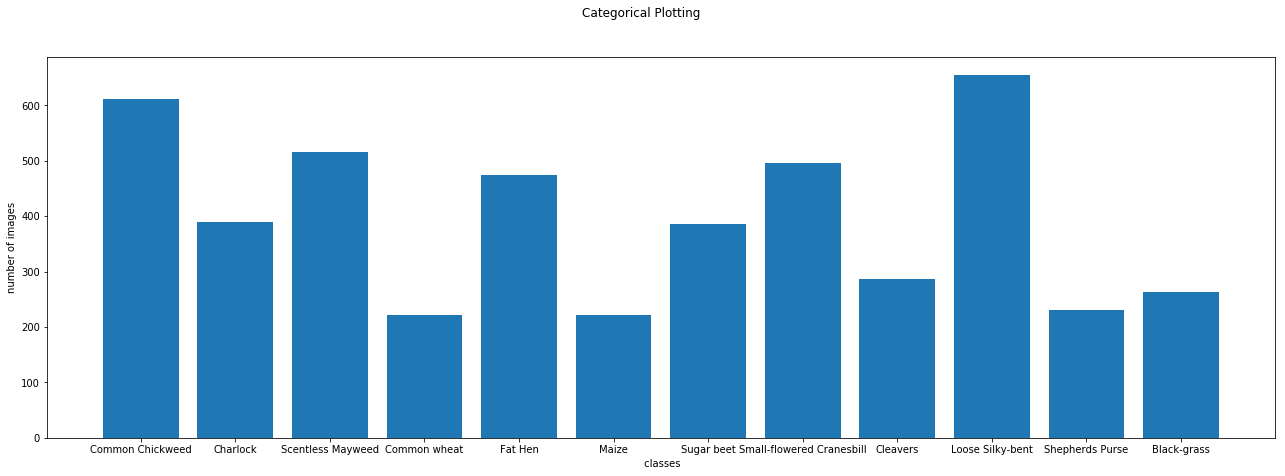

In [69]:

values =[]
labels=[]
for label in set(classes):
  values.append(len(images[classes == label]))
  labels.append(label)

fig, ax = plt.subplots(figsize=(22,7))
ax.bar(labels, values)
ax.set_xlabel(" classes")
ax.set_ylabel("number of images")
#axs[1].scatter(label, )
  #axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

**SHOW THE NAMES OF LABELS**

In [70]:

labels

['Common Chickweed',
 'Charlock',
 'Scentless Mayweed',
 'Common wheat',
 'Fat Hen',
 'Maize',
 'Sugar beet',
 'Small-flowered Cranesbill',
 'Cleavers',
 'Loose Silky-bent',
 'Shepherds Purse',
 'Black-grass']

In [0]:

len(set(classes))

12

**LOOK AT THE IMAGE AFTER RESIZE**

*   IMAGE #49 OF ARRAY IMAGES IS VISUALISED



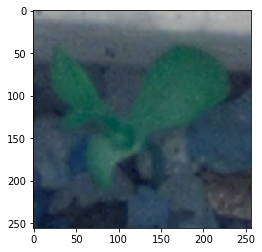

In [71]:

plt.imshow(images[50])


# **DATA EXPLORATION**

*   LETS VISUALISE THE FIRST FOUR IMAGES PRESENT INTHE CLASS SCENTLESS MAYWEED
*  nb_rows AND nb_cols MAKE SURE THERE ARE CELLS, ONE FOR EACH IMAGE
* THEY ALSO EXTRACT THE FIRST FOUR IMAGES AND VISUALISE THEM



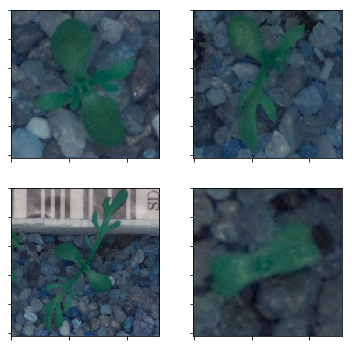

In [72]:

def plot_for_class(label):
    nb_rows = 2
    nb_cols = 2
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(6, 6))
    class_images =images[classes== label]
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(class_images[n])
            n += 1 
plot_for_class("Scentless Mayweed")

**LETS PLOT ONE IMAGE NAMED 1300C3D9 THROUGH ASOLUTE PATH VALUE**

In [0]:
#!ls "train/Scentless Mayweed" 1300c3cd9.png

img = cv2.imread("/content/data1/train/train/Scentless Mayweed/1300c3cd9.png")

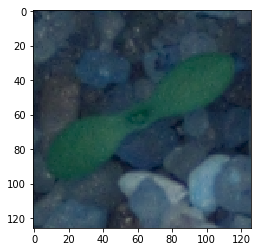

In [74]:
plt.imshow(img)

# **Apply image processing on the images**

   

*    convert image from RGB to HSV. It helps us distinguish certain colours and reduce other colors intensity on them
*   Apply closing opration(one of mophological opration where in important parts of HSV image will be extracted)
*    Apply segmentation 
*    Apply sharpening





In [0]:
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp



# **PUT ALL THOSE FUNCTIONS TOGETHER**


*   A FUNCTION TO  CALL ALL THE ABOVE FUNCTIONS



In [0]:

def segment(img):

  #image_mask = create_mask_for_plant(img)
  image_segmented = segment_plant(img)
  image_sharpen = sharpen_image(image_segmented)
  return image_sharpen

# **ITERATE ON ALL IMAGES**

In [0]:

for indx, image in enumerate(images):
  try:
     images[indx] = segment(image)
      
  except:
    print(indx)
    continue
      

In [78]:
image = images[classes == "Small-flowered Cranesbill"][2]

a=segment_plant(image)
a.shape

(256, 256, 3)

# **PLOT SAMPLE TO SEE IMAGE BEFORE AND AFTER**

* First image shows the normal RGB version of it before any processing
* Second image shows the HSV version,which has successfully extracted important colours.
* Third image shows the segmented version of image
* Fourth image shows the sharpened version of previously segmented image



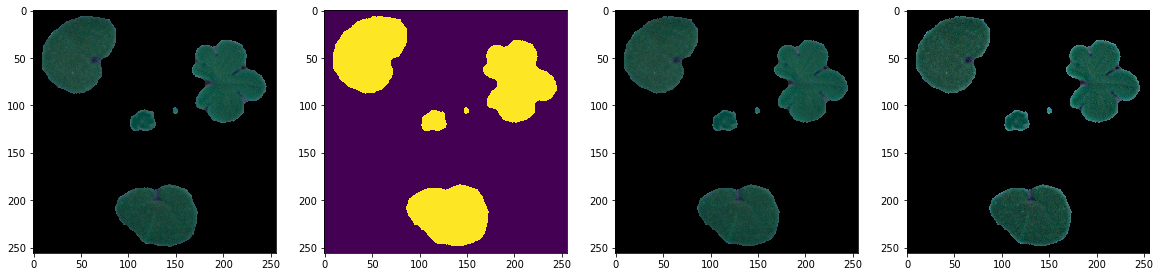

In [80]:

image = images[classes == "Small-flowered Cranesbill"][40]

image_mask = create_mask_for_plant(image)
image_segmented = segment_plant(image)
image_sharpen = sharpen_image(image_segmented)

fig, axs = plt.subplots(1, 4, figsize=(20, 20))
axs[0].imshow(image)
axs[1].imshow(image_mask)
axs[2].imshow(image_segmented)
axs[3].imshow(image_sharpen)

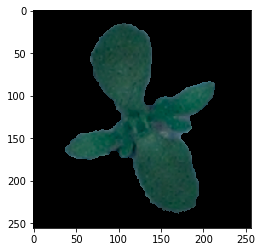

In [81]:
plt.imshow(images[0])

In [82]:
images.shape

(4750, 256, 256, 3)

# **LABEL ENCODER**


*   ENCODING CLASSES WITH NUMERICAL VALUES



In [0]:

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(classes)

In [84]:
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

# **SPLITTING DATA INTO TRAINING AND TESTING SET**


*   70% TRAINING SET 
*   30% TESTING SET 




In [0]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3, random_state=50)

In [86]:
X_train.shape

(3325, 256, 256, 3)

# **CREATE VALIDATION SET**


*   SPLIT TEST DATA INTO 50% TEST
*   50% VALIDATION 



In [0]:

random_seed = 2
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=random_seed)

In [89]:
print(X_test.shape)
print(X_val.shape)

(712, 256, 256, 3)
(713, 256, 256, 3)


# **CNN MODEL**

In [91]:

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# Set the CNN model 

batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size,256, 256, 3)))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))



model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 256, 256, 32)      2432      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 256, 256, 32)      25632     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 64, 64)        0         
__________

In [0]:
opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

**TRAINING THE MODEL**

In [93]:
model.fit(X_train, y_train, epochs = 50, validation_data = (X_val,Y_val),batch_size = batch_size)

Train on 3325 samples, validate on 713 samples
Epoch 1/50
3325/3325 [==============================] - 26s 8ms/step - loss: 2.8030 - acc: 0.1353 - val_loss: 2.4276 - val_acc: 0.1487
Epoch 2/50
3325/3325 [==============================] - 26s 8ms/step - loss: 2.2884 - acc: 0.2457 - val_loss: 1.9884 - val_acc: 0.3380
Epoch 3/50
3325/3325 [==============================] - 27s 8ms/step - loss: 1.9395 - acc: 0.3426 - val_loss: 2.0068 - val_acc: 0.4628
Epoch 4/50
3325/3325 [==============================] - 26s 8ms/step - loss: 1.7830 - acc: 0.3889 - val_loss: 1.8084 - val_acc: 0.4783
Epoch 5/50
3325/3325 [==============================] - 26s 8ms/step - loss: 1.6180 - acc: 0.4481 - val_loss: 1.5890 - val_acc: 0.4881
Epoch 6/50
3325/3325 [==============================] - 27s 8ms/step - loss: 1.4431 - acc: 0.5020 - val_loss: 1.5007 - val_acc: 0.5820
Epoch 7/50
3325/3325 [==============================] - 26s 8ms/step - loss: 1.3530 - acc: 0.5438 - val_loss: 1.5659 - val_acc: 0.4783
Epoch 8/

**EVALUATING THE MODEL**

In [94]:
score = model.evaluate(X_test, y_test, verbose=0, batch_size = 38)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7812929799717464
Test accuracy: 0.7556179761886597


In [95]:
X_test.shape

(712, 256, 256, 3)

In [0]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 30
batch_size = 38

# **DATA AUGUMENTATION TO PREVENT OVERFITTING**


*   Images presnt with us are randomly cropped, zoomed, rotated etc to create new images which are then trained
*   This helps us increase the dataset size without actually having to find new images



In [0]:

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [98]:
X_train, X_test, y_train, y_test
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
 - 45s - loss: 0.6324 - acc: 0.7958 - val_loss: 0.5927 - val_acc: 0.7980
Epoch 2/30
 - 44s - loss: 0.5865 - acc: 0.8200 - val_loss: 0.6882 - val_acc: 0.7966
Epoch 3/30
 - 43s - loss: 0.6406 - acc: 0.8064 - val_loss: 0.5564 - val_acc: 0.8079
Epoch 4/30
 - 43s - loss: 0.5912 - acc: 0.8094 - val_loss: 0.5356 - val_acc: 0.8387
Epoch 5/30
 - 43s - loss: 0.5882 - acc: 0.8197 - val_loss: 0.6107 - val_acc: 0.8022
Epoch 6/30
 - 43s - loss: 0.6090 - acc: 0.8113 - val_loss: 0.5956 - val_acc: 0.8135
Epoch 7/30
 - 43s - loss: 0.5734 - acc: 0.8161 - val_loss: 0.5736 - val_acc: 0.8022

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 8/30
 - 43s - loss: 0.3838 - acc: 0.8733 - val_loss: 0.5540 - val_acc: 0.8303
Epoch 9/30
 - 43s - loss: 0.3775 - acc: 0.8678 - val_loss: 0.7151 - val_acc: 0.7980
Epoch 10/30
 - 43s - loss: 0.3362 - acc: 0.8884 - val_loss: 0.6629 - val_acc: 0.8261

Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.000250000011874362

**MODEL EVALUATION AFTER AUGMENTING**

In [99]:
score = model.evaluate(X_test, y_test, verbose=0, batch_size = None)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.5744343882196405
Test accuracy: 0.8455056179775281


# **MODEL EVALUATION**


*   Plotting Loss value for each epoch
*   Plotting Accuracy for each epoch



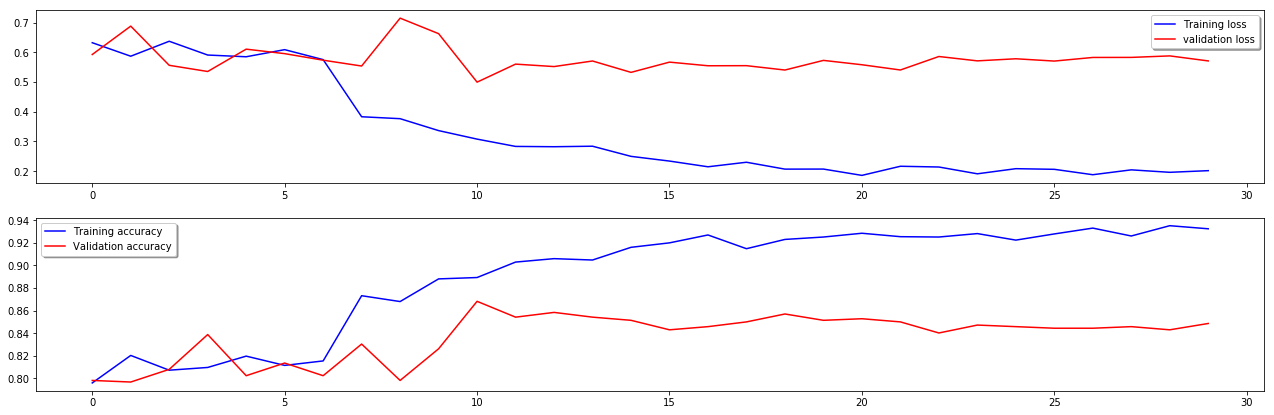

In [100]:
fig, ax = plt.subplots(2,1 , figsize=(22,7))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

# **CONFUSION MATRIX**

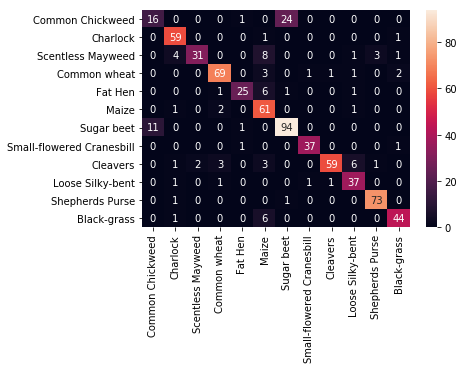

In [101]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_val)
Y_true = np.argmax(Y_val,axis = 1)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
cm=confusion_matrix(Y_true,Y_pred_classes)
cm_dataframe=pd.DataFrame(cm,labels,labels)
sns.heatmap(cm_dataframe,annot=True)


# **MODEL PREDICTION**

In [0]:
Predicted_classes = model.predict_classes(X_test)

In [0]:
wrong_preds = X_test[Predicted_classes != np.argmax(y_test)]

In [104]:
set(Predicted_classes)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}